# DBSCAN
- 밀도 이용
- 클러스터 갯수 지정X
- params
    - epsilon: neighbor 정의 위한 거리
    - minimum points: 밀집지역 정의 위한 neighbor 갯수
- point
    - core: $\epsilon$ 거리 안에 MinPts 이상의 neighbor있는 point
    - border: 고밀도 데이터와 연결되었으나, 이웃은 MinPts이하
    - outlier: 연결안됨
- `DBSCAN` attr:
    - `labels_`: 클러스터 번호
    - `core_sample_indices_`: 핵심 데이터 인덱스

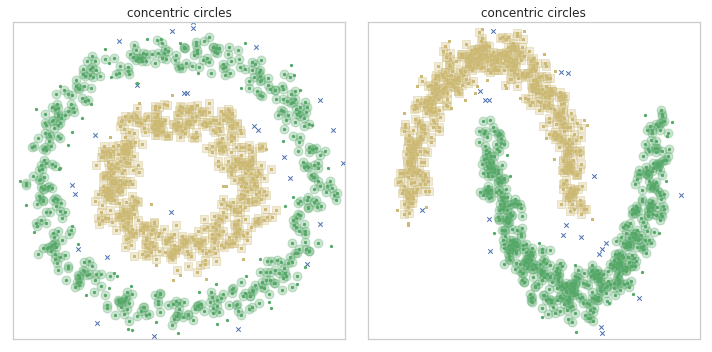

In [21]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    mod = DBSCAN(eps=eps)
    y_pred = mod.fit_predict(X)
    
    idx_outlier = np.logical_not((mod.labels_ == 0) | (mod.labels_ == 1))
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[mod.labels_ == 0, 0], X[mod.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[mod.labels_ == 1, 0], X[mod.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    
    # core point
    X_core = X[mod.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(mod.labels_ == 0)[0]).\
                               intersection(mod.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(mod.labels_ == 1)[0]).\
                               intersection(mod.core_sample_indices_)))
    
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("concentric circles", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("concentric circles", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("Circle ARI:", adjusted_rand_score(y1, y_pred1))
print("Circle AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("Moon ARI:", adjusted_rand_score(y2, y_pred2))
print("Moon AMI:", adjusted_mutual_info_score(y2, y_pred2))

Circle ARI: 0.9414262371038592
Circle AMI: 0.8361564005781013
Moon ARI: 0.9544844153926417
Moon AMI: 0.8606657095694518
